In [1]:
#import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv('enron_emailsdf.csv',index_col=[0])

## DATA PREPROCESING

An insinght into the Enron emails database 

In [3]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month


## Summary statistics

In [4]:
stats2=df.groupby(['Year'])["Content Length"].agg(['mean', 'median', 'var', 'std', 'sem']).round(1)
stats2

,mean,median,var,std,sem
Year,,,,,
1980,59.0,59.0,NaN,NaN,NaN
1986,568.0,568.0,279752.0,528.9,374.0
1997,101.9,66.5,10396.1,102.0,9.6
1998,1433.5,807.5,4014566.4,2003.6,213.6
1999,1356.8,611.0,20912113.2,4573.0,66.3
2000,1463.7,691.0,9192037.4,3031.8,13.1
2001,2056.8,810.0,96951989.1,9846.4,26.5
2002,2170.1,806.0,215100618.2,14666.3,89.0
2004,4020.0,2468.0,25475300.1,5047.3,892.2


In [5]:
stats3=df.groupby(['Year'])["Message-ID"].count()
stats3=pd.DataFrame(stats3)
stats3.columns=['Total emails']
stats3 =stats3.reset_index(drop=False)
stats3

,Year,Total emails
0,1980,1
1,1986,2
2,1997,112
3,1998,88
4,1999,4758
5,2000,53440
6,2001,138505
7,2002,27158
8,2004,32
9,2005,1


<Figure size 1440x720 with 0 Axes>

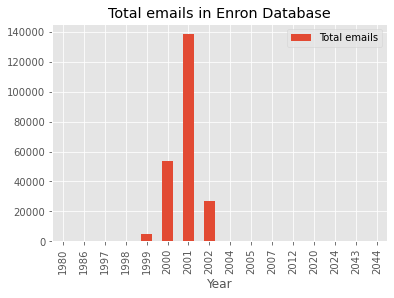

In [39]:
mpl.style.use('ggplot')
plt.figure(figsize=(20,10)) 
stats3.plot.bar(x='Year', y='Total emails', rot=90)
plt.title('Total emails in Enron Database')

plt.savefig('images/Natalia-ETL-totalemails.png', bbox_inches='tight')

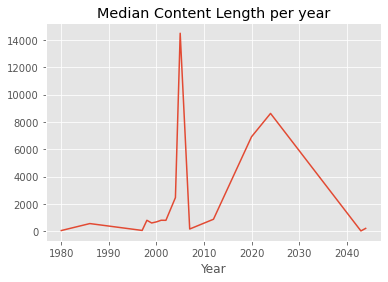

In [40]:
test=df.groupby(['Year'])["Content Length"].median()
test.plot(kind='line',title="Median Content Length per year")
plt.savefig('images/Natalia-ETL-ContentLength.png', bbox_inches='tight')

<AxesSubplot:title={'center':'Content Length per Jail Type in 2021'}, xlabel='Jail'>

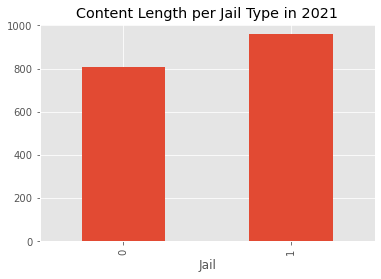

In [8]:
(df[df['Year'] == 2001].groupby(['Jail'])["Content Length"].median()).plot(kind='bar',title="Content Length per Jail Type in 2021")

<AxesSubplot:title={'center':'Content Length per month in 2021'}, xlabel='month'>

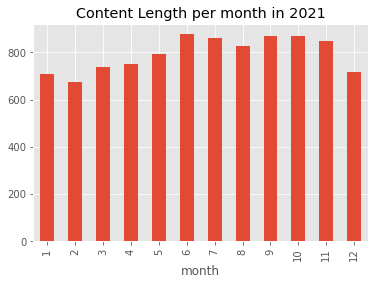

In [9]:
(df[df['Year'] == 2001].groupby(['month'])["Content Length"].median()).plot(kind='bar',title="Content Length per month in 2021")

<AxesSubplot:title={'center':'Median Content Length per Response Type'}, ylabel='Content Length'>

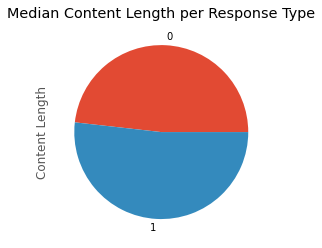

In [10]:
(df.groupby(['Reply'])["Content Length"].median()).plot(kind='pie',title="Median Content Length per Response Type")

<AxesSubplot:title={'center':'Content Length per Jail Type'}, ylabel='Content Length'>

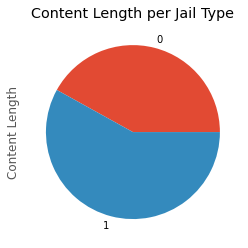

In [11]:
(df.groupby(['Jail'])["Content Length"].median()).plot(kind='pie',title="Content Length per Jail Type")

In [12]:
df.groupby(['Jail'])["Content Length"].median()

Jail
0     774.0
1    1071.0
Name: Content Length, dtype: float64

In [13]:
median= df["Origin"].value_counts().median()

For distributions that have outliers or are skewed, the median is often the preferred measure of central tendency because the median is more resistant to outliers than the mean.

In [14]:
df["Origin"].mode()

0    DASOVICH-J
dtype: object

In [15]:
df["Origin"].value_counts()[:10].index.tolist()

['DASOVICH-J',
 'Kaminski-V',
 'JONES-T',
 'Taylor-M',
 'SHACKLETON-S',
 'MANN-K',
 'KITCHEN-L',
 'Farmer-D',
 'NEMEC-G',
 'Sanders-R']

In [24]:
jail=['Lay-K','Skilling-J', 'Forney-J', 'Delainey-D']
people=df.groupby(['Origin'])["Message-ID"].count()
people=pd.DataFrame(people)
people.columns=['Total emails']
people=people.reset_index(drop=False)
people.isin(jail)

In [33]:

df1 = people[people['Origin'].isin(jail)]
df1

,Origin,Total emails
43,Delainey-D,877
57,Forney-J,213
115,Lay-K,1338
216,Skilling-J,1053


Text(0.5, 1.0, 'Total emails per people of interest')

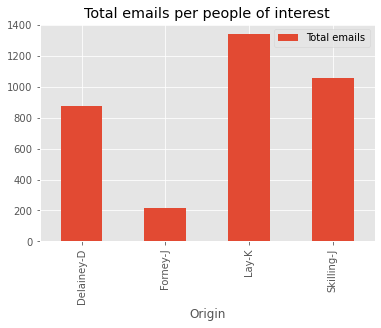

In [38]:
df1.plot.bar(x='Origin', y='Total emails')
plt.title('Total emails per people of interest')